In [ ]:
import tensorflow as tf

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurindah","key":"3ec8e449562ecf53144815bc0e68c95e"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/dogs-cats-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/dataset')

['test_set', 'training_set']

In [ ]:
base_dir = '/tmp/dataset'

train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
      
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      
    ])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
    

In [ ]:
# model fitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit_generator(
                              train_generator, 
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_steps=50,
                              verbose=1,
                              callbacks=[callback]
                              )

Epoch 1/50
100/100 [==============================] - 102s 1s/step - loss: 0.7012 - accuracy: 0.5135 - val_loss: 0.6921 - val_accuracy: 0.5120
Epoch 2/50
100/100 [==============================] - 101s 1s/step - loss: 0.6743 - accuracy: 0.5615 - val_loss: 0.6443 - val_accuracy: 0.6190
Epoch 3/50
100/100 [==============================] - 101s 1s/step - loss: 0.6626 - accuracy: 0.5935 - val_loss: 0.6618 - val_accuracy: 0.5770
Epoch 4/50
100/100 [==============================] - 101s 1s/step - loss: 0.6549 - accuracy: 0.6065 - val_loss: 0.6202 - val_accuracy: 0.6270
Epoch 5/50
100/100 [==============================] - 105s 1s/step - loss: 0.6324 - accuracy: 0.6310 - val_loss: 0.6345 - val_accuracy: 0.6590
Epoch 6/50
100/100 [==============================] - 102s 1s/step - loss: 0.6169 - accuracy: 0.6515 - val_loss: 0.6240 - val_accuracy: 0.6420
Epoch 7/50
100/100 [==============================] - 103s 1s/step - loss: 0.5910 - accuracy: 0.6750 - val_loss: 0.5980 - val_accuracy: 0.6850

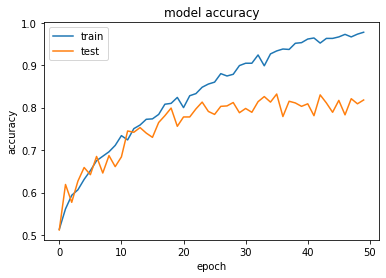

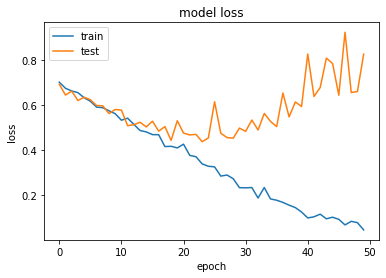

In [ ]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpern4mkjk/assets


INFO:tensorflow:Assets written to: /tmp/tmpern4mkjk/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root


In [ ]:
import os
import tarfile
def tardir(path, tar_name):
    with tarfile.open(tar_name, "w:gz") as tar_handle:
        for root, dirs, files in os.walk(path):
            for file in files:
                tar_handle.add(os.path.join(root, file))
tardir('root/my_model.pb', 'my_model.tar.gz')
%cd

/root
